In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

In [6]:
fid = drive.ListFile({'q':"title='green finder.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('green finder.zip')

In [7]:
!unzip \*.zip  && rm *.zip 

Streaming output truncated to the last 5000 lines.
  inflating: Fruit_Flower_Veg/Tomato Cherry Red/293_100.jpg  
  inflating: Fruit_Flower_Veg/Tomato Cherry Red/294_100.jpg  
  inflating: Fruit_Flower_Veg/Tomato Cherry Red/295_100.jpg  
  inflating: Fruit_Flower_Veg/Tomato Cherry Red/296_100.jpg  
  inflating: Fruit_Flower_Veg/Tomato Cherry Red/297_100.jpg  
  inflating: Fruit_Flower_Veg/Tomato Cherry Red/298_100.jpg  
  inflating: Fruit_Flower_Veg/Tomato Cherry Red/299_100.jpg  
  inflating: Fruit_Flower_Veg/Tomato Cherry Red/29_100.jpg  
  inflating: Fruit_Flower_Veg/Tomato Cherry Red/2_100.jpg  
  inflating: Fruit_Flower_Veg/Tomato Cherry Red/300_100.jpg  
  inflating: Fruit_Flower_Veg/Tomato Cherry Red/301_100.jpg  
  inflating: Fruit_Flower_Veg/Tomato Cherry Red/302_100.jpg  
  inflating: Fruit_Flower_Veg/Tomato Cherry Red/303_100.jpg  
  inflating: Fruit_Flower_Veg/Tomato Cherry Red/304_100.jpg  
  inflating: Fruit_Flower_Veg/Tomato Cherry Red/305_100.jpg  
  inflating: Fruit_Flo

In [8]:
PATH = '/content/Fruit_Flower_Veg'

In [9]:
PATH

'/content/Fruit_Flower_Veg'

In [10]:
 labels = os.listdir(PATH)

In [11]:
labels

['Lychee',
 'Cherry Rainier',
 'Physalis or Gooseberry',
 'Salak',
 'Physalis or Gooseberry with Husk',
 'Onion Red',
 'Pear Williams',
 'Roses',
 'Watermelon',
 'Fruit LICENSE.txt',
 'Mangostan',
 'Cherry Red',
 'Tomato Cherry Red',
 'Lemon Meyer',
 'Beetroot',
 'Grape White',
 'Pineapple',
 'Apple Red',
 'Avocado',
 'Rambutan',
 'Passion Fruit',
 'Banana Lady Finger',
 'Sunflowers',
 'Cherry Black',
 'Plum',
 'Corn or Maize',
 'Orange',
 'Cantaloupe',
 'Guava',
 'Tomato Cherry Maroon',
 'Pitahaya Red',
 'Apple Red Delicious',
 'Pepper Yellow',
 'Cherry Yellow',
 'Clementine',
 'Grapefruit Pink',
 'Apple Crimson Snow',
 'Quince',
 'Ginger Root',
 'Banana',
 'Grape Blue',
 'Apple Golden',
 'Peach Flat',
 'Tomato Campari',
 'Fig',
 'Kaki',
 'Flower LICENSE.txt',
 'Tomato Green Unripe',
 'Tulips',
 'Grapefruit White',
 'Banana Red',
 'Tangelo',
 'Apple Braeburn',
 'Cauliflower',
 'Strawberry',
 'Melon or Piel de Sapo',
 'Hazelnut',
 'Nectarine',
 'Mulberry',
 'Pear Kaiser',
 'Potato Red'

In [12]:
len(os.listdir(PATH))

119

In [13]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.3)

train_generator = datagen.flow_from_directory(
    PATH,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    seed=120,
    subset='training')

val_generator = datagen.flow_from_directory(
    PATH,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    seed=120,
    subset='validation')

Found 65900 images belonging to 116 classes.
Found 28145 images belonging to 116 classes.


In [14]:
sample_training_images, _ = next(train_generator)

In [15]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 20, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout
    plt.show()

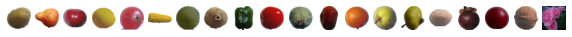

In [16]:
plotImages(sample_training_images[:20])

In [17]:
IMG_SHAPE = (224,224,3)
themodel= tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [18]:
model = tf.keras.Sequential([
  themodel,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(116, activation='softmax')
])

In [19]:
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 116)               3828      
Total params: 2,630,484
Trainable params: 2,596,372
Non-trainable params: 34,112
_________________________________________________________________


In [25]:
history = model.fit(
      train_generator,
      epochs=5,
      validation_data=val_generator)

Epoch 1/5
2060/2060 [==============================] - 820s 398ms/step - loss: 0.5498 - accuracy: 0.8543 - val_loss: 10.6804 - val_accuracy: 0.2350
Epoch 2/5
2060/2060 [==============================] - 817s 397ms/step - loss: 0.1405 - accuracy: 0.9581 - val_loss: 6.8302 - val_accuracy: 0.3246
Epoch 3/5
2060/2060 [==============================] - 809s 393ms/step - loss: 0.1089 - accuracy: 0.9668 - val_loss: 8.4473 - val_accuracy: 0.2914
Epoch 4/5
2060/2060 [==============================] - 811s 394ms/step - loss: 0.0825 - accuracy: 0.9748 - val_loss: 4.0283 - val_accuracy: 0.5037
Epoch 5/5
2060/2060 [==============================] - 820s 398ms/step - loss: 0.0670 - accuracy: 0.9797 - val_loss: 1.7026 - val_accuracy: 0.6969


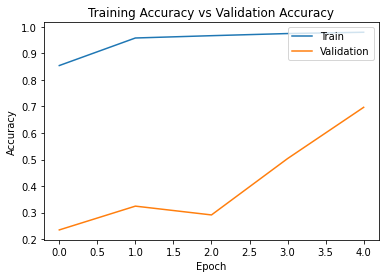

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

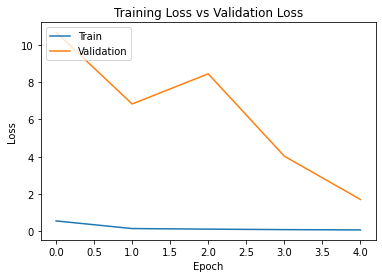

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
score = model.evaluate(train_generator, verbose=0)
print("Loss: " + str(score[0]))                  
print("Accuracy: " + str(score[1]*100) + "%")

Loss: 1.155479073524475
Accuracy: 77.7040958404541%
